# ANOVA
- 아노바 분산검정은 둘 이상 모집단의 평균이 서로 동일한지 테스트 한다.
- 다양한 요인 수준에 관한 반응 변수의 평균을 비교함으로써 하나 이상의 요인의 중요도를 평가한다.
- 귀무가설 : '모든 모집단의 평균은 같다'
- 대립가설 : '적어도 하나의 모집단은 평균이 다르다'

In [6]:
# 모듈 불러오기
import pandas as pd
from scipy import stats

In [7]:
# 데이터 만들기
fertilizer = pd.DataFrame(
    data = {
        '비료1' : [62,62,90,42,84,64],
        '비료2' : [54,56,58,36,72,34],
        '비료3' : [48,62,92,96,92,80]
    }
)

In [8]:
# 데이터 확인
fertilizer

,비료1,비료2,비료3
0,62,54,48
1,62,56,62
2,90,58,92
3,42,36,96
4,84,72,92
5,64,34,80


In [11]:
# 일원 분산 분석
one_way_anova = stats.f_oneway(fertilizer['비료1'], fertilizer['비료2'], fertilizer['비료3'])

In [13]:
# 결과분석
# p-value가 0.05보다 크므로 귀무가설을 기각시키지 못한다.
# 따라서, 귀무가설을 채택하고 비료1, 비료2, 비료3의 평균은 모두 동일하다
one_way_anova

F_onewayResult(statistic=3.6634935025687523, pvalue=0.05063590143901569)

In [14]:
fertilizer.mean(axis = 0)

비료1    67.333333
비료2    51.666667
비료3    78.333333
dtype: float64

# ANOVA

In [46]:
# 모듈 가져오기
import pandas as pd
from scipy import stats
import numpy as np
import urllib
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [47]:
# url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = pd.DataFrame(np.genfromtxt(urllib.request.urlopen(url), delimiter = ','))

In [48]:
# 데이터 확인하기
data

,0,1
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0
5,354.0,1.0
6,380.0,1.0
7,392.0,1.0
8,206.0,2.0
9,210.0,2.0


In [49]:
group1 = data[data[1] == 1][0]
group2 = data[data[1] == 2][0]
group3 = data[data[1] == 3][0]

{'whiskers': [<matplotlib.lines.Line2D at 0x20d9b8bb5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d9b8bbca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d9b8bb250>,
 'medians': [<matplotlib.lines.Line2D at 0x20d9b8c23a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20d9b8c26a0>,
 'means': []}

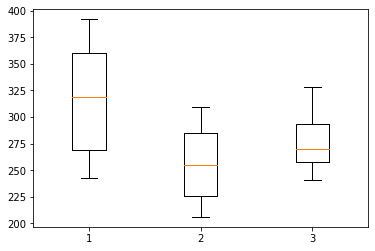

In [50]:
# boxplot
plt.boxplot([group1, group2, group3])

In [51]:
# 일원분산분석
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3.7113359882669763, pvalue=0.043589334959178244)

# pandas와 statsmodel을 사용한 일원분산분석

In [52]:
data.columns = ['value', 'treatment']
data

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0
5,354.0,1.0
6,380.0,1.0
7,392.0,1.0
8,206.0,2.0
9,210.0,2.0


In [55]:
model = ols('value ~ C(treatment)', data).fit()

In [56]:
print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


# 이원분산분석

In [57]:
# 데이터 가져오기
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = pd.DataFrame(np.genfromtxt(urllib.request.urlopen(url), delimiter = ','), columns = ['head_size','fetus','observer'])

In [58]:
# 데이터 확인
data

,head_size,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0
5,13.8,1.0,2.0
6,13.9,1.0,3.0
7,13.7,1.0,3.0
8,13.8,1.0,3.0
9,13.8,1.0,4.0


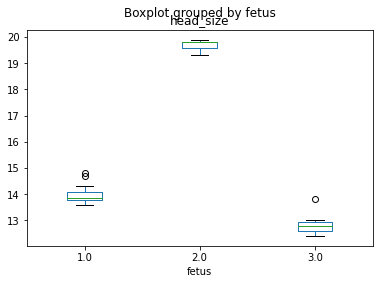

In [62]:
# boxplot 그리기
data.boxplot(column = 'head_size', by = 'fetus', grid = False)

In [63]:
# 분산분석으로 상관관계
formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, data).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN
